In [2]:
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [3]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GOD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GOD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd
Data_true = pd.read_csv("C:/Users/GOD/Desktop/True.csv")
Data_fake = pd.read_csv("C:/Users/GOD/Desktop/Fake.csv")

In [5]:
Data_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [6]:
Data_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [7]:
#Counting by Subjects in Real news
for key,count in Data_true.subject.value_counts().items():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Data_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


In [8]:
#Counting by Subjects in Fake news
for key,count in Data_fake.subject.value_counts().items():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Data_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


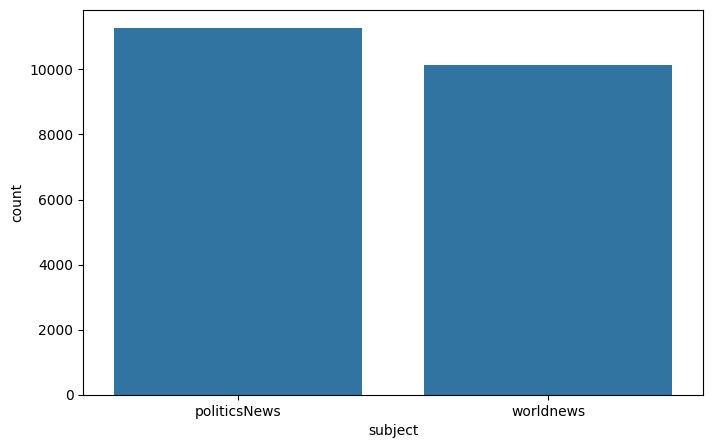

In [9]:
#ploting the Subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot(x=Data_true["subject"])
plt.show()

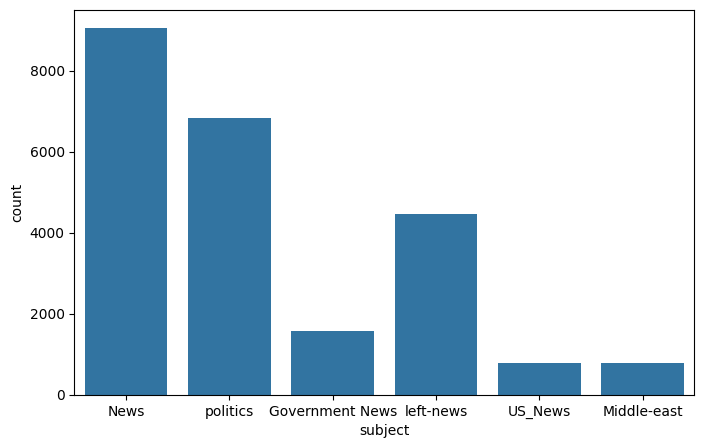

In [10]:
#ploting the Subjects in Fake news
plt.figure(figsize=(8,5))
sns.countplot(x=Data_fake["subject"])
plt.show()

In [11]:
Data_true['label']= 1
Data_fake['label']= 0
Dataset = pd.concat([Data_true, Data_fake])
Dataset["Article"] = Dataset["title"] + Dataset["text"]
Dataset.sample(frac = 1) #Shuffle 100%
Dataset = Dataset.loc[:,['Article','label']]

In [12]:
Dataset

,Article,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [13]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [14]:
##  Applying the wordpre method to the dataset
Dataset['Article']=Dataset['Article'].apply(wordpre)

In [15]:
Dataset.head()

,Article,label
0,as u s budget fight looms republicans flip t...,1
1,u s military to accept transgender recruits o...,1
2,senior u s republican senator let mr muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much mor...,1


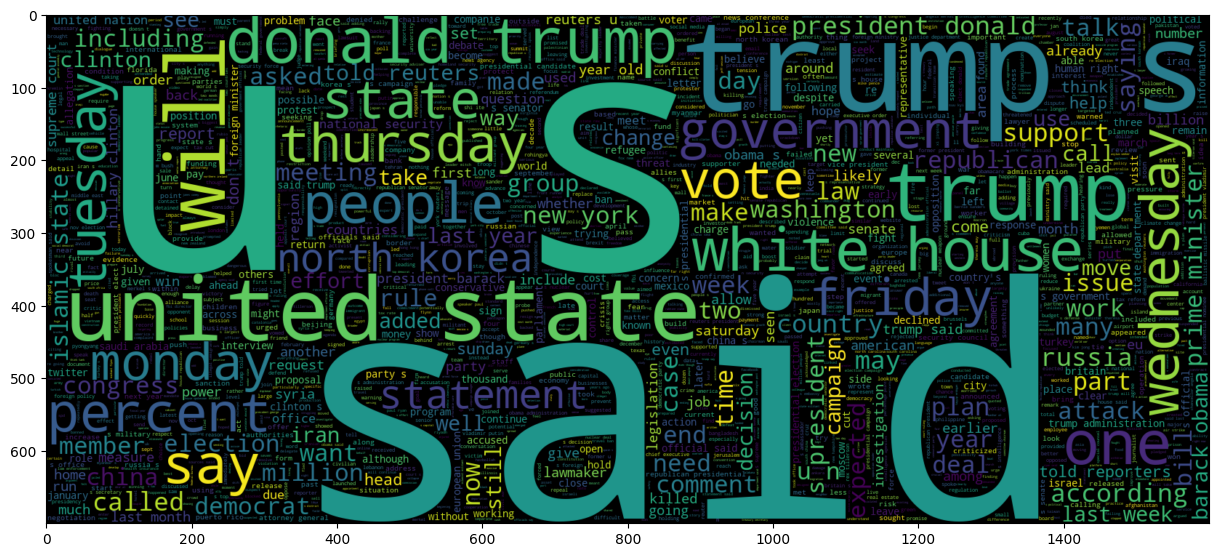

In [16]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset[Dataset.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

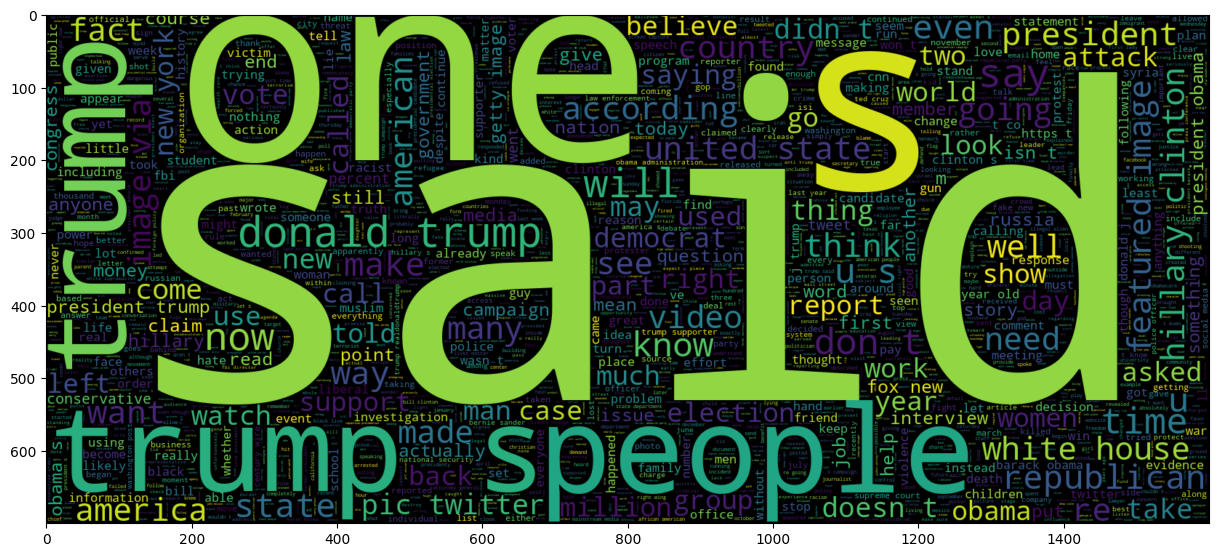

In [17]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset[Dataset.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")